<a href="https://colab.research.google.com/github/favouroo/Tech-Crush-DS-Task-3-Coursework/blob/main/Task%203%20(ii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

pd.set_option('display.float_format', '{:,.2f}'.format)

In [47]:
pizza_info = pd.read_csv("/content/all_pizza_data.csv")
pizza_info.head(4)

,order_details_id,order_id,transaction date,pizza_type_id,pizza_id,name,category,ingredients,size,price,quantity
0,11,6,2015-01-01 12:29:36,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1
1,239,102,2015-01-02 17:54:04,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1
2,294,124,2015-01-02 20:12:34,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1
3,458,194,2015-01-03 21:21:24,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1


In [48]:
pizza_info.isna().sum()

,0
order_details_id,0
order_id,0
transaction date,0
pizza_type_id,0
pizza_id,0
name,0
category,0
ingredients,0
size,0
price,0


In [49]:
pizza_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   transaction date  48620 non-null  object 
 3   pizza_type_id     48620 non-null  object 
 4   pizza_id          48620 non-null  object 
 5   name              48620 non-null  object 
 6   category          48620 non-null  object 
 7   ingredients       48620 non-null  object 
 8   size              48620 non-null  object 
 9   price             48620 non-null  float64
 10  quantity          48620 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 4.1+ MB


In [50]:
pizza_stat= pizza_info.describe()
pizza_stat_2sf = round(pizza_stat,2)
pizza_stat_2sf

,order_details_id,order_id,price,quantity
count,"48,620.00","48,620.00","48,620.00","48,620.00"
mean,"24,310.50","10,701.48",16.49,1.02
std,"14,035.53","6,180.12",3.62,0.14
min,1.00,1.00,9.75,1.00
25%,"12,155.75","5,337.00",12.75,1.00
50%,"24,310.50","10,682.50",16.50,1.00
75%,"36,465.25","16,100.00",20.25,1.00
max,"48,620.00","21,350.00",35.95,4.00


In [51]:
#convert transaction date to datetime
pizza_info["transaction date"] = pd.to_datetime(pizza_info["transaction date"])
pizza_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   transaction date  48620 non-null  datetime64[ns]
 3   pizza_type_id     48620 non-null  object        
 4   pizza_id          48620 non-null  object        
 5   name              48620 non-null  object        
 6   category          48620 non-null  object        
 7   ingredients       48620 non-null  object        
 8   size              48620 non-null  object        
 9   price             48620 non-null  float64       
 10  quantity          48620 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 4.1+ MB


In [52]:
#to find total revenue for the year, first create column named revenue then sum it up
pizza_info["revenue"] = pizza_info["price"] * pizza_info["quantity"]
pizza_info.head(3)

,order_details_id,order_id,transaction date,pizza_type_id,pizza_id,name,category,ingredients,size,price,quantity,revenue
0,11,6,2015-01-01 12:29:36,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1,12.75
1,239,102,2015-01-02 17:54:04,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1,12.75
2,294,124,2015-01-02 20:12:34,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1,12.75


In [53]:
#total sum of revenue
tot_piz_sum = pizza_info["revenue"].sum()
tot_piz_rev = (f'{tot_piz_sum:,.2f}')
print(f"The total revenue realized from sales of pizza in the year 2015 is {tot_piz_rev}.")

The total revenue realized from sales of pizza in the year 2015 is 817,860.05.


In [54]:
#total quantity sold
tot_qty_sold = pizza_info["quantity"].sum()
tqs = (f'{tot_qty_sold:,}')
print(f"The total quantity of pizza sold in the year 2015 is {tqs} pieces.")

The total quantity of pizza sold in the year 2015 is 49,574 pieces.


In [55]:
pizza_info['order_id'].value_counts()

,count
order_id,
10760,21
18845,21
13906,15
17464,15
18280,15
...,...
16325,1
16012,1
15233,1


In [56]:
group_orders = pizza_info.groupby("order_id")
tot_orders= len(group_orders)
tot_piz_order = (f"{tot_orders:,}")
print(f"The total order of pizza taken in the year 2015 is {tot_piz_order}.")

The total order of pizza taken in the year 2015 is 21,350.


In [57]:
#to know the number of pizza_types they sell
pizza_info['pizza_type_id'].value_counts().reset_index()

,pizza_type_id,count
0,classic_dlx,2416
1,bbq_ckn,2372
2,hawaiian,2370
3,pepperoni,2369
4,thai_ckn,2315
5,cali_ckn,2302
6,spicy_ital,1887
7,sicilian,1887
8,southw_ckn,1885
9,four_cheese,1850


In [58]:
#pizza types sold
group_pizza_type = pizza_info.groupby("pizza_type_id")
tot_pizza_type= len(group_pizza_type)
print(f"In 2015, the company had a total of {tot_pizza_type} different types of pizza.")

In 2015, the company had a total of 32 different types of pizza.


In [59]:
pizza_stat= pizza_info.select_dtypes(["float64", "int64"]).describe()
pizza_stat_2sf = round(pizza_stat,2)
pizza_stat_2sf

,order_details_id,order_id,price,quantity,revenue
count,"48,620.00","48,620.00","48,620.00","48,620.00","48,620.00"
mean,"24,310.50","10,701.48",16.49,1.02,16.82
std,"14,035.53","6,180.12",3.62,0.14,4.44
min,1.00,1.00,9.75,1.00,9.75
25%,"12,155.75","5,337.00",12.75,1.00,12.75
50%,"24,310.50","10,682.50",16.50,1.00,16.50
75%,"36,465.25","16,100.00",20.25,1.00,20.50
max,"48,620.00","21,350.00",35.95,4.00,83.00


In [60]:
#the average price of the pizzas
avg_price = pizza_info["price"].mean()
avg_2sf = round(avg_price, 2)
print(f"The average price of a pizza is {avg_2sf}.")

The average price of a pizza is 16.49.


In [61]:
#to get peak hours, create hours column
pizza_info["hours"] = pizza_info["transaction date"].dt.hour
pizza_info.head(3)

,order_details_id,order_id,transaction date,pizza_type_id,pizza_id,name,category,ingredients,size,price,quantity,revenue,hours
0,11,6,2015-01-01 12:29:36,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1,12.75,12
1,239,102,2015-01-02 17:54:04,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1,12.75,17
2,294,124,2015-01-02 20:12:34,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1,12.75,20


In [160]:
#sort by transation date in descending order
sort_descending = pizza_info.sort_values(by="transaction date", ascending=False)
sort_descending.head(4)

,order_details_id,order_id,transaction date,pizza_type_id,pizza_id,name,category,ingredients,size,price,quantity,revenue,hours,day_of_week
478,48620,21350,2015-12-31 23:02:05,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1,12.75,23,Thursday
44720,48619,21349,2015-12-31 22:09:54,mexicana,mexicana_l,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",L,20.25,1,20.25,22,Thursday
19293,48618,21348,2015-12-31 21:23:10,napolitana,napolitana_s,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00,1,12.00,21,Thursday
5466,48616,21348,2015-12-31 21:23:10,ckn_alfredo,ckn_alfredo_m,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",M,16.75,1,16.75,21,Thursday


In [63]:
pizza_info["hours"].value_counts().sort_index(ascending= False).reset_index()

,hours,count
0,23,68
1,22,1370
2,21,2528
3,20,3487
4,19,4350
5,18,5359
6,17,5143
7,16,4185
8,15,3170
9,14,3521


In [64]:
order_hours = pizza_info["hours"].value_counts()

In [65]:
rev_per_hour = pizza_info.groupby("hours")["revenue"].sum()
rev_per_hour

,revenue
hours,
9,83.00
10,303.65
11,"44,935.80"
12,"111,877.90"
13,"106,065.70"
14,"59,201.40"
15,"52,992.30"
16,"70,055.40"
17,"86,237.45"


In [66]:
order_hours.index

Index([12, 13, 18, 17, 19, 16, 14, 20, 15, 11, 21, 22, 23, 10, 9], dtype='int32', name='hours')

In [67]:
order_hours.values

array([6543, 6203, 5359, 5143, 4350, 4185, 3521, 3487, 3170, 2672, 2528,
       1370,   68,   17,    4])

In [68]:
rev_per_hour.index

Index([9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype='int32', name='hours')

In [69]:
rev_per_hour.values

array([8.300000e+01, 3.036500e+02, 4.493580e+04, 1.118779e+05,
       1.060657e+05, 5.920140e+04, 5.299230e+04, 7.005540e+04,
       8.623745e+04, 8.929685e+04, 7.262890e+04, 5.821540e+04,
       4.202980e+04, 2.281515e+04, 1.121350e+03])

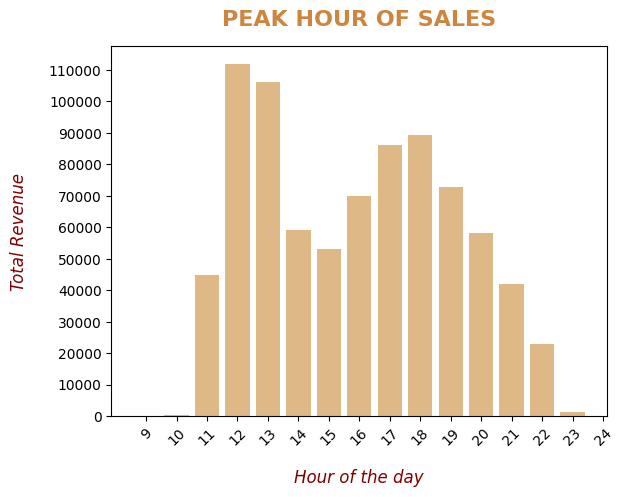

In [124]:
plt.bar(rev_per_hour.index, rev_per_hour.values, color = "burlywood")
plt.title("PEAK HOUR OF SALES", fontsize= 16, color="peru", fontweight= "bold", pad = 15)
plt.xticks(range(9,25,1), rotation = 45)
plt.yticks(range(0, 120000, 10000))
plt.xlabel("Hour of the day", fontsize= 12, color="maroon", fontstyle= "italic", labelpad = 15)
plt.ylabel("Total Revenue", fontsize= 12, color="maroon", fontstyle= "italic", labelpad = 15)
plt.show()

In [79]:
print("Max single transaction:", pizza_info['revenue'].max())
print("Total revenue overall:", pizza_info['revenue'].sum())

Max single transaction: 83.0
Total revenue overall: 817860.05


In [104]:
#create a new dataframe for hours and revenue per hour
revenue_per_hour = pd.DataFrame({"hours": rev_per_hour.index, "revenue": rev_per_hour.values})
revenue_per_hour

,hours,revenue
0,9,83.00
1,10,303.65
2,11,"44,935.80"
3,12,"111,877.90"
4,13,"106,065.70"
5,14,"59,201.40"
6,15,"52,992.30"
7,16,"70,055.40"
8,17,"86,237.45"
9,18,"89,296.85"


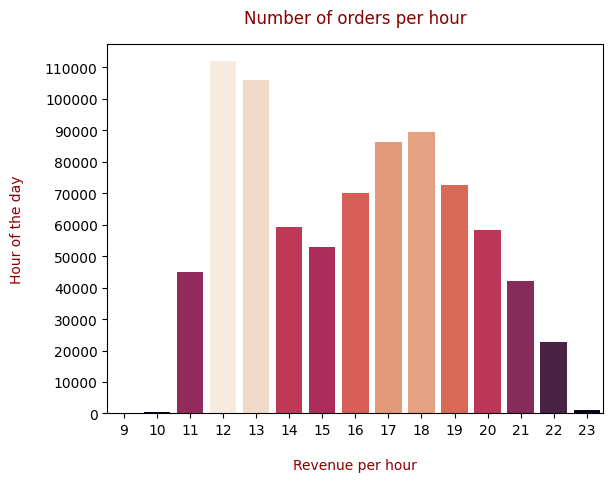

In [151]:
#using sns baarplot for the same purpose

sns.barplot(data = revenue_per_hour, y = "revenue", x= "hours", palette = "rocket", hue= "revenue", legend= False)
plt.title("Number of orders per hour", pad=15, color = "darkred")
plt.ylabel("Hour of the day", labelpad=15, color = "darkred")
plt.xlabel ("Revenue per hour", labelpad=15, color = "darkred")
plt.yticks(np.arange(0, 120000, step= 10000))
plt.show()

/tmp/ipython-input-582003388.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pizza_info, x="hours", y="revenue", estimator=sum, palette = "mako")


<Axes: xlabel='hours', ylabel='revenue'>

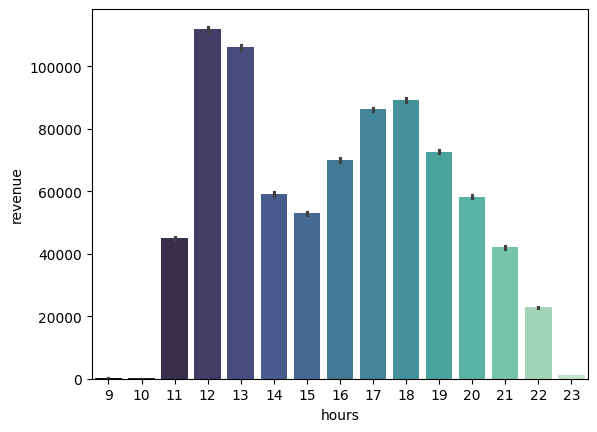

In [116]:
sns.barplot(data=pizza_info, x="hours", y="revenue", estimator=sum, palette = "mako")

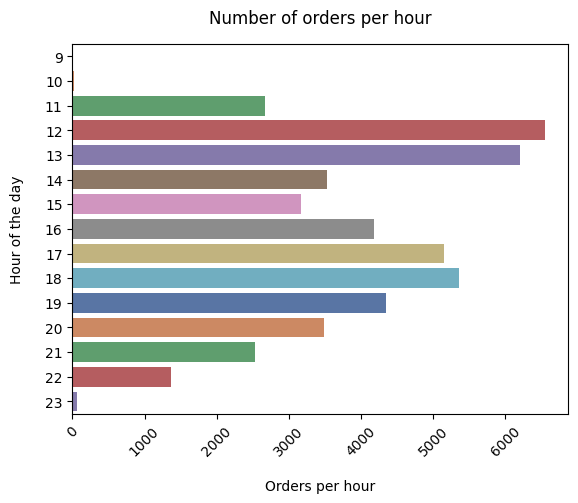

In [134]:
sns.countplot(data = pizza_info, y= "hours", palette = "deep", hue= "hours", legend = False)
plt.title("Number of orders per hour", pad= 15)
plt.ylabel("Hour of the day", labelpad=15)
plt.xlabel ("Orders per hour", labelpad=15)
plt.xticks(rotation = 45)

plt.show()

In [276]:
pizza_info['day of week'] = pizza_info['transaction date'].dt.day_name()
pizza_info.head(3)

,order_details_id,order_id,transaction date,pizza_type_id,pizza_id,name,category,ingredients,size,price,quantity,revenue,hours,day_of_week,day of week,week order
478,48620,21350,2015-12-31 23:02:05,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1,12.75,23,Thursday,Thursday,3
44720,48619,21349,2015-12-31 22:09:54,mexicana,mexicana_l,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",L,20.25,1,20.25,22,Thursday,Thursday,3
19293,48618,21348,2015-12-31 21:23:10,napolitana,napolitana_s,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00,1,12.00,21,Thursday,Thursday,3


In [279]:
pizza_info.drop(columns= ["day_of_week"], inplace= True)
pizza_info.head(3)

,order_details_id,order_id,transaction date,pizza_type_id,pizza_id,name,category,ingredients,size,price,quantity,revenue,hours,day of week,week order
478,48620,21350,2015-12-31 23:02:05,bbq_ckn,bbq_ckn_s,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",S,12.75,1,12.75,23,Thursday,3
44720,48619,21349,2015-12-31 22:09:54,mexicana,mexicana_l,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",L,20.25,1,20.25,22,Thursday,3
19293,48618,21348,2015-12-31 21:23:10,napolitana,napolitana_s,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00,1,12.00,21,Thursday,3


In [277]:
pizza_info["week order"] = pizza_info["transaction date"].dt.dayofweek

In [278]:
daily_sales= pizza_info.groupby(["day of week", "week order"])['revenue'].sum().reset_index().sort_values(by= "week order")
daily_sales

,day of week,week order,revenue
1,Monday,0,"107,329.55"
5,Tuesday,1,"114,133.80"
6,Wednesday,2,"114,408.40"
4,Thursday,3,"123,528.50"
0,Friday,4,"136,073.90"
2,Saturday,5,"123,182.40"
3,Sunday,6,"99,203.50"


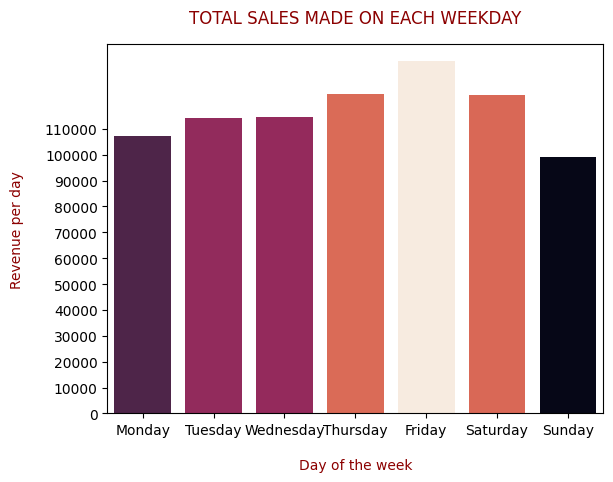

In [274]:
sns.barplot(data = daily_sales, y = "revenue", x= "day of week", palette = "rocket", hue= "revenue", legend= False)
plt.title("TOTAL SALES MADE ON EACH WEEKDAY", pad=15, color = "darkred")
plt.ylabel("Revenue per day", labelpad=15, color = "darkred")
plt.xlabel ("Day of the week", labelpad=15, color = "darkred")
plt.yticks(np.arange(0, 120000, step= 10000))
plt.show()

In [262]:
sales_per_day = pizza_info[["day of week", "week order"]].value_counts().reset_index().sort_values(by= "week order")
sales_per_weekday = pd.DataFrame(sales_per_day)
sales_per_weekday

,day of week,week order,count
5,Monday,0,6369
4,Tuesday,1,6753
3,Wednesday,2,6797
2,Thursday,3,7323
0,Friday,4,8106
1,Saturday,5,7355
6,Sunday,6,5917


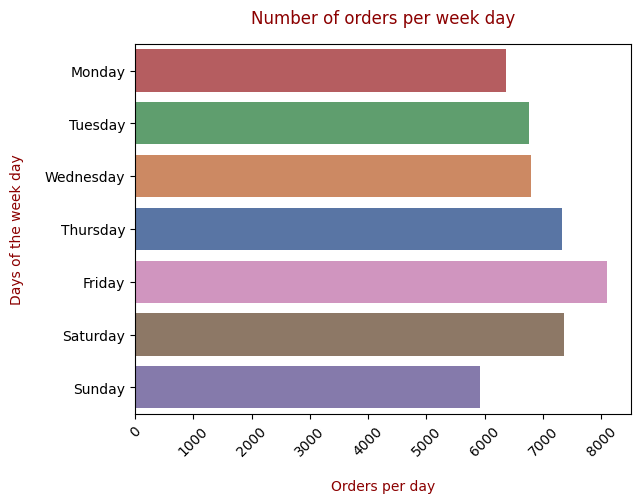

In [271]:
week_day_order = sales_per_weekday['day of week'].tolist()
sns.countplot(data = pizza_info, y= "day of week", order=week_day_order, palette= "deep", hue= "day of week", legend=False)
plt.title("Number of orders per week day", pad= 15, color = "darkred")
plt.ylabel("Days of the week day", labelpad=15, color = "darkred")
plt.xlabel ("Orders per day", labelpad=15, color = "darkred")
plt.xticks(rotation = 45)

plt.show()

In [305]:
#top 5 pizza
top_5 = pd.DataFrame(pizza_info["pizza_type_id"].value_counts().sort_values(ascending=False))
top_5_pizza= top_5[top_5["count"]>1000]
top_5_pizza

,count
pizza_type_id,
classic_dlx,2416
bbq_ckn,2372
hawaiian,2370
pepperoni,2369
thai_ckn,2315
cali_ckn,2302
spicy_ital,1887
sicilian,1887
southw_ckn,1885


In [72]:
pizza_stat= pizza_info.select_dtypes(["float64", "int64"]).describe()
pizza_stat_2sf = round(pizza_stat,2)
pizza_stat_2sf

,order_details_id,order_id,price,quantity,revenue
count,"48,620.00","48,620.00","48,620.00","48,620.00","48,620.00"
mean,"24,310.50","10,701.48",16.49,1.02,16.82
std,"14,035.53","6,180.12",3.62,0.14,4.44
min,1.00,1.00,9.75,1.00,9.75
25%,"12,155.75","5,337.00",12.75,1.00,12.75
50%,"24,310.50","10,682.50",16.50,1.00,16.50
75%,"36,465.25","16,100.00",20.25,1.00,20.50
max,"48,620.00","21,350.00",35.95,4.00,83.00


In [280]:
pizza_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48620 entries, 478 to 16043
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   transaction date  48620 non-null  datetime64[ns]
 3   pizza_type_id     48620 non-null  object        
 4   pizza_id          48620 non-null  object        
 5   name              48620 non-null  object        
 6   category          48620 non-null  object        
 7   ingredients       48620 non-null  object        
 8   size              48620 non-null  object        
 9   price             48620 non-null  float64       
 10  quantity          48620 non-null  int64         
 11  revenue           48620 non-null  float64       
 12  hours             48620 non-null  int32         
 13  day of week       48620 non-null  object        
 14  week order        48620 n